# HCM rates by Clinvar and Risk 
##### Updated 07/03/2024
##### Selin Kubali

#### Goal:
Graph frequency of different Clinvar categories across all genes.

#### Required inputs
Variant data files - Stored in */selected_genes/hcm/variant_files*

Clinvar data - Stored in */selected_genes/hcm/csv_files/variant_summary.txt*

In [6]:
variant_summary_file = 'variant_summary.txt'

##### Download and unzip Clinvar data

In [7]:
def download_gene(variant_summary_path = '/selected_genes/hcm/csv_files/', variant_summary_name = variant_summary_file):
    variant_summary_file_name = variant_summary_file + '.gz'
    variant_summary_path = variant_summary_path + variant_summary_file_name
    !dx download $variant_summary_path
    !gzip -d $variant_summary_file_name
download_gene()

variant_summary.txt.gz
gzip: can't stat: variant_summary.txt.gz (variant_summary.txt.gz.gz): No such file or directory


##### Load packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Arial') 
plt.rcParams.update({'font.size': 12})

In [ ]:
def create_model(dir_path = 'selected_genes/hcm/variant_files', variant_file = variant_summary_name):
    """ Load Clinvar information for all genes """
    genes = ['ACTC1', 'ACTN2', 'ALPK3', 'DES','FLNC','MYBPC3','MYH6','MYH7','MYL2','MYL3','PLN','PTPN11','TNNI3','TNNT2','TPM1','TTR']
    consequence_list = []
    for gene in genes:
        consequence_dict = {}
        variant_info = pd.read_csv(f'/mnt/project/{dir_path}/{gene}/variants.csv')

        # load, clean, and merge clinvar information
        clinvar_df = pd.read_csv(variant_file, sep = '\t', dtype = {'Chromosome':'str'})
        clinvar_df = clinvar_df[clinvar_df['Assembly'] == 'GRCh38']
        clinvar_df = clinvar_df.rename(columns={"Chromosome": "Chrom", "Start": "Pos", "ReferenceAlleleVCF": "Ref", "AlternateAlleleVCF": "Alt"})
        clinvar_df = clinvar_df[["Name", "Chrom", "Pos", "Ref", "Alt", "ClinicalSignificance"]]
        clinvar_variant_df = pd.merge(variant_info, clinvar_df, how = 'left', on = ['Pos', 'Ref', 'Alt'])
        consequence_dict[gene] = clinvar_variant_df['ClinicalSignificance'].dropna()

        print(consequence_dict[gene])
        consequence_list.append(consequence_dict)
        
    return consequence_list
consequence_list = create_model()
        

#### Group Clinvar consequences

In [12]:
cons = pd.DataFrame({})
clinvar = [['Uncertain significance'], ['Conflicting classifications of pathogenicity'], ['Likely benign', 'Benign/Likely benign', 
 'Benign'], ['Pathogenic', 'Pathogenic/Likely pathogenic', 'Likely pathogenic']]
var_list = ['Uncertain significance', 'Conflicting', 'B/LB', 'P/LP']
dict_list = []
for i, gene in zip(range(16),  ['ACTC1', 'ACTN2', 'ALPK3', 'DES','FLNC','MYBPC3','MYH6','MYH7','MYL2','MYL3','PLN','PTPN11','TNNI3','TNNT2','TPM1','TTR']):
    var_dict = {}
    for var, name in zip(clinvar, var_list):
        var_dict[name] = sum(c in var for c in consequence_list[i][gene])

    dict_list.append(var_dict)
clinvar_by_gene = pd.DataFrame(dict_list)
clinvar_by_gene['gene'] = ['ACTC1', 'ACTN2', 'ALPK3', 'DES','FLNC','MYBPC3','MYH6','MYH7','MYL2','MYL3','PLN','PTPN11','TNNI3','TNNT2','TPM1','TTR']

##### Create bar chart

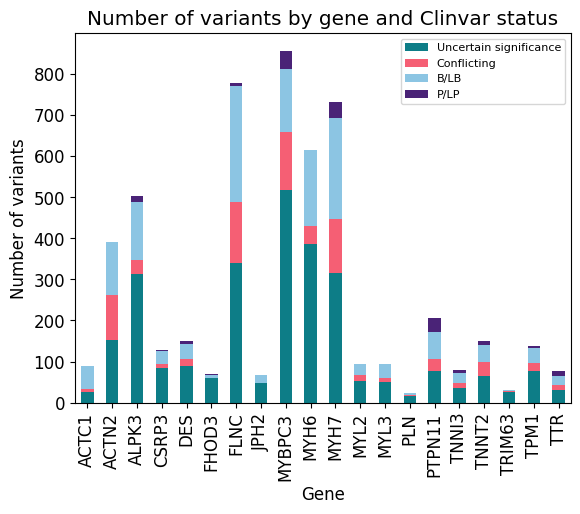

In [42]:
clinvar_by_gene.set_index('gene')
clinvar_by_gene.plot(kind='bar', x = 'gene', stacked=True, color=['#0d7d87', '#f55f74', '#8cc5e3', '#4a2377'])
plt.xlabel("Gene")
plt.ylabel("Number of variants")
plt.title("Number of variants by gene and Clinvar status")
plt.legend(fontsize = 8)